# Data exploration: Millennium development goals
Data from this competition: https://www.drivendata.org/competitions/1/united-nations-millennium-development-goals/.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
from scipy.stats import ttest_rel
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Load the data from the competition, removing any possible meaningless column.

In [2]:
df = pd.read_csv('./data/TrainingSet.csv', index_col=[0])
# Remove the [] and everything within from the column names
df.columns = df.columns.str.replace(r"\[.*\]","").str.rstrip()
df.head()

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,Country Name,Series Code,Series Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.769214,Afghanistan,allsi.bi_q1,(%) Benefits held by 1st 20% population - All ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.027746,Afghanistan,allsp.bi_q1,(%) Benefits held by 1st 20% population - All ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.244887,Afghanistan,allsa.bi_q1,(%) Benefits held by 1st 20% population - All ...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.933105,Afghanistan,allsi.gen_pop,(%) Generosity of All Social Insurance
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.996814,Afghanistan,allsp.gen_pop,(%) Generosity of All Social Protection


## 2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [3]:
"In total there are {} unique global categories".format(df['Series Code'].str.split('.', expand=True)[0].nunique())

'In total there are 62 unique global categories'

## 3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [4]:
def country_info (country_name):
    """
    param 1 country_name: Country name to filter on.
    returns: A Pandas DataFrame indexed by year with all the series as columns.
    """
    return df.loc[df['Country Name'] == country_name]\
            .set_index('Series Name')\
            .drop(['Country Name', 'Series Code'], axis=1)\
            .T

In [5]:
country_info('Afghanistan').head()

Series Name,(%) Benefits held by 1st 20% population - All Social Insurance,(%) Benefits held by 1st 20% population - All Social Protection,(%) Benefits held by 1st 20% population - All Social Safety Nets,(%) Generosity of All Social Insurance,(%) Generosity of All Social Protection,(%) Generosity of All Social Safety Nets,(%) Program participation - All Social Insurance,(%) Program participation - All Social Protection,(%) Program participation - All Social Safety Nets,(%) Program participation - Unemp benefits and ALMP,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Achieve universal primary education,"Adjusted net enrollment rate, primary, female (% of primary school age children)","Adjusted net enrollment rate, primary, male (% of primary school age children)",Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: education expenditure (current US$),Adjusted savings: energy depletion (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: mineral depletion (% of GNI),Adjusted savings: mineral depletion (current US$),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Adjusted savings: net forest depletion (current US$),Adjusted savings: particulate emission damage (% of GNI),Adjusted savings: particulate emission damage (current US$),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),Agriculture value added per worker (constant 2005 US$),"Agriculture, value added (% of GDP)","Agriculture, value added (annual % growth)","Agriculture, value added (constant 2005 US$)","Agriculture, value added (constant LCU)","Agriculture, value added (current LCU)","Agriculture, value added (current US$)","Air transport, freight (million ton-km)","Air transport, passengers carried","Air transport, registered carrier departures worldwide","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Arable land (hectares per person),Arable land (hectares),Armed forces personnel (% of total labor force),"Armed forces personnel, total",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",Average grace period on new external debt commitments (years),"Average grace period on new external debt commitments, official (years)","Average grace period on new external debt commitments, private (years)",Average grant element on new external debt commitments (%),"Average grant element on new external debt commitments, official (%)","Average grant element on new external debt commitments, private (%)",Average interest on new external

In [6]:
def series_to_country(series_name):
    """
    param 1 series_name: series_name to filter on.
    returns: A Pandas DataFrame with the country name as columns and the year as index without Series Code and Series Name.
    """
    return df.loc[df['Series Name'] == series_name]\
        .drop(['Series Code', 'Series Name'], axis=1)\
        .set_index('Country Name')\
        .T

In [7]:
series_to_country('(%) Program participation - All Social Protection').head()

Country Name,Afghanistan,Argentina,Bangladesh,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Chile,Dominican Republic,El Salvador,Georgia,Ghana,Guatemala,India,Kazakhstan,Kenya,Kosovo,Kyrgyz Republic,"Macedonia, FYR",Malawi,Mauritius,Mongolia,Montenegro,Nicaragua,Paraguay,Philippines,Poland,Russian Federation,Rwanda,Serbia,Sri Lanka,Thailand,Timor-Leste,Ukraine,"Venezuela, RB",Vietnam,West Bank and Gaza,"Yemen, Rep."
1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

We plotted a centered 3 year rolling mean of our three countries together with the data from our countries.

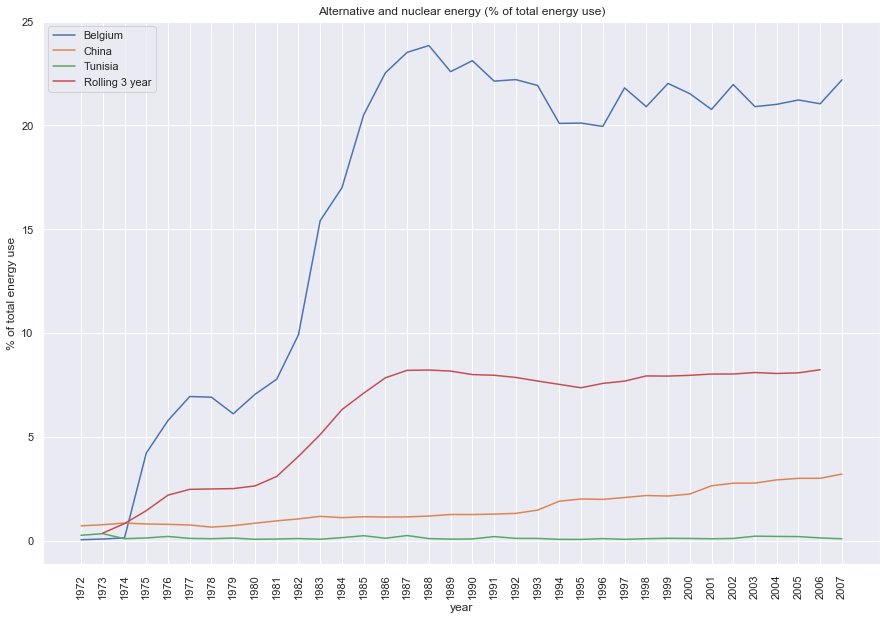

In [8]:
list_countries = ['Belgium', 'China', 'Tunisia']
plt.subplots(figsize=(15,10))

data = series_to_country('Alternative and nuclear energy (% of total energy use)')[list_countries]
# create the 3 year centered rolling mean of our countries
data['Rolling 3 year'] = data.mean(axis=1).rolling(3, center=True).mean()

plt.xticks(rotation=90)
plt.plot(data.index.values, data)
plt.legend(data.columns.values)
plt.title('Alternative and nuclear energy (% of total energy use)')
plt.ylabel('% of total energy use')
plt.xlabel('year')
plt.show()

## 5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In this case we defined 'largest' as the onces with the largest mean Electricity production from coal sources (kWh) over all the years.
We used the mean because it is more representative and takes into account all the data over the different years.

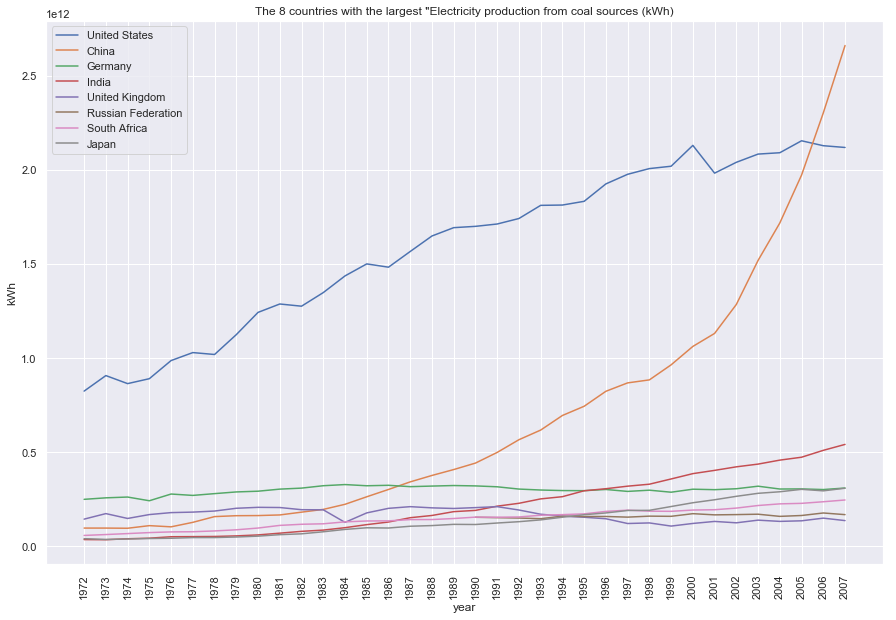

In [9]:
plt.subplots(figsize=(15,10))

ele_coal = series_to_country('Electricity production from coal sources (kWh)')

list_countries = ele_coal.mean()\
                           .nlargest(8)\
                           .index.values

ele_coal = ele_coal[list_countries]
plt.xticks(rotation=90)
plt.plot(ele_coal.index.values, ele_coal)
plt.legend(list_countries)
plt.title('The 8 countries with the largest "Electricity production from coal sources (kWh)')
plt.ylabel('kWh')
plt.xlabel('year')
plt.show()

## 6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

In this case we defined 'largest increase in the last 5 years' as the percentual increase between 2002 and 2007 regardeless of the change in between. Even though we have data for year to year percentage change, we believe this calculation is more accurate.

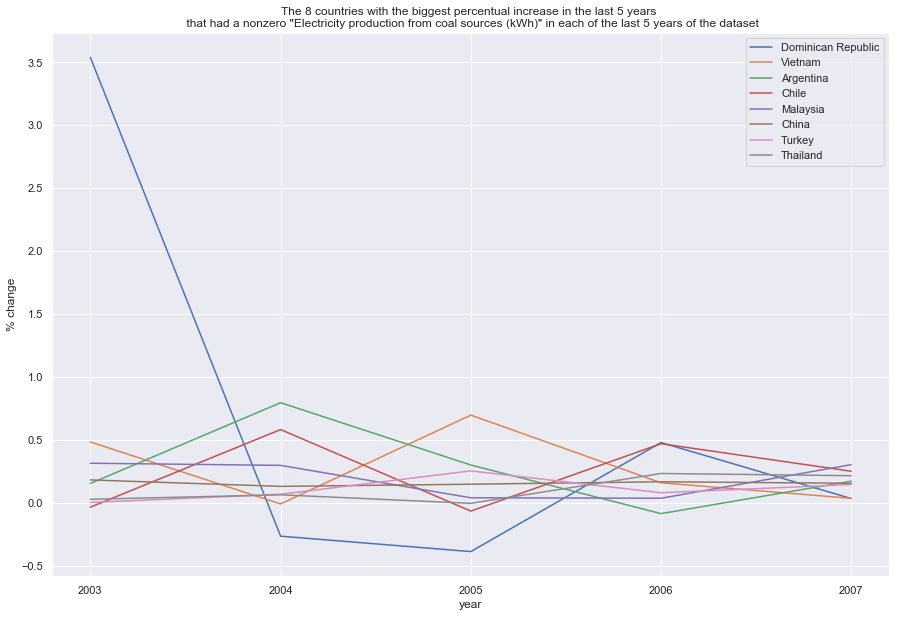

In [10]:
plt.subplots(figsize=(15,10))

df1 = series_to_country('Electricity production from coal sources (kWh)').iloc[-6:]

df1 = df1.loc[:, (df1.iloc[:]>0).all()]
# calculate the % increase between 2002 and 2007 and select the 8 largest indexes
countries = df1.iloc[[0, -1]].pct_change().iloc[1].nlargest(8).index.values
largest_increase = df1[countries]

plt.plot(largest_increase.index.values, largest_increase.pct_change())
plt.legend(largest_increase.columns.values)
plt.title('The 8 countries with the biggest percentual increase in the last 5 years \n that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset')
plt.ylabel('% change')
plt.xlabel('year')
plt.show()

## 7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

In [11]:
df['Series Name'].loc[df['Series Name'].str.contains('health|death')].unique()

array(['Battle-related deaths (number of people)',
       'Births attended by skilled health staff (% of total)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Cause of death, by injury (% of total)',
       'Cause of death, by non-communicable diseases (% of total)',
       'External resources for health (% of total expenditure on health)',
       'Health expenditure, public (% of total health expenditure)',
       'Lifetime risk of maternal death (%)',
       'Lifetime risk of maternal death (1 in: rate varies by country)',
       'Improve maternal health', 'Number of infant deaths',
       'Number of maternal deaths', 'Number of neonatal deaths',
       'Number of under-five deaths',
       'Out-of-pocket health expenditure (% of private expenditure on health)',
       'Out-of-pocket health expenditure (% of total expenditure on health)',
       'ARI treatment (% of children under 5 taken to a health provider)

In [12]:
def world_map(locations, data, data_title, graph_title):
    """
    param1 locations: The countries for which to plot data
    param2 data: The information to plot on the geomap
    param3 data_title: The title of the marker information
    param4 graph_title: The title of the geomap
    
    return None ==> the function will plot a geomap
    """
    data = [ dict(
        type = 'choropleth',
        locations = locations,
        z = data,
        locationmode = 'country names',
        text = locations,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = data_title),
            )
       ]

    layout = dict(
        title = graph_title,
        geo = dict(
            showframe = False,
            showocean = True,
            oceancolor = 'rgb(0,255,255)',
            type = 'equirectangular'
        ),
    )

    fig = dict(data=data, layout=layout)
    py.iplot(fig, validate=False, filename='world_temp_map')

### 7.1 Poverty indicator

The poverty rate in the last five years is decreasing from around 18% in 2003 to 10% in 2007 on average for the countries (see the countries below) which have data in the last five years.

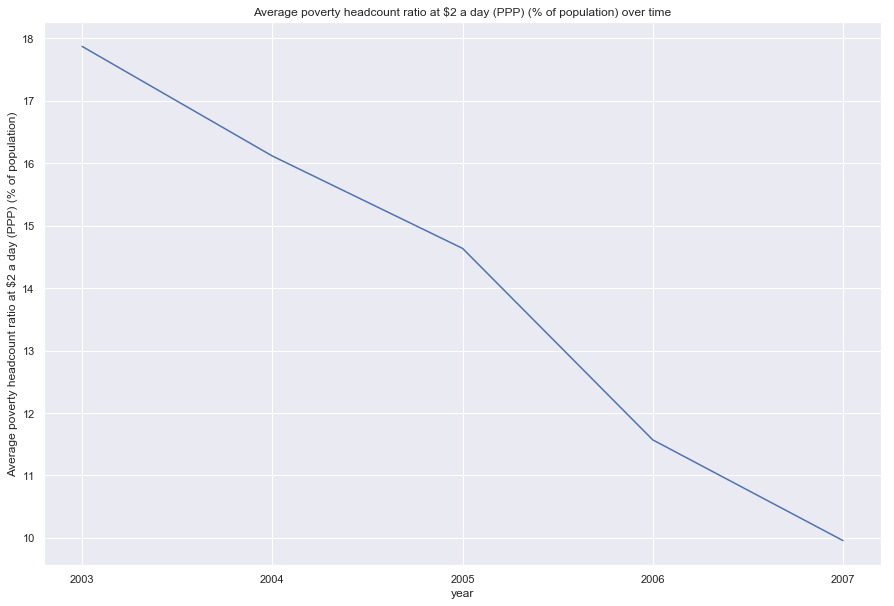

In [13]:
plt.subplots(figsize=(15,10))
pov_data = series_to_country('Poverty headcount ratio at $2 a day (PPP) (% of population)').iloc[-5:]
pov_general = pov_data.loc[:, (pov_data.iloc[:]>0).all()].mean(axis=1)
plt.plot(pov_general.index.values, pov_general)
plt.title('Average poverty headcount ratio at $2 a day (PPP) (% of population) over time')
plt.ylabel('Average poverty headcount ratio at $2 a day (PPP) (% of population)')
plt.xlabel('year')
plt.show()

In [14]:
pov_2007 = pov_data.loc[:, (pov_data.iloc[:]>0).all()].loc['2007']
pov_countries = pov_2007.index.values
pov_countries

array(['Argentina', 'Armenia', 'Brazil', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'El Salvador', 'Honduras', 'Moldova',
       'Paraguay', 'Peru', 'Romania', 'Russian Federation', 'Serbia',
       'Turkey', 'Ukraine', 'Uruguay'], dtype=object)

The poverty rate in the last five years is decreasing for the countries with the highest poverty rates which have data in the last five years. In this case the inflation rates are not taken into account so the result can be biased.

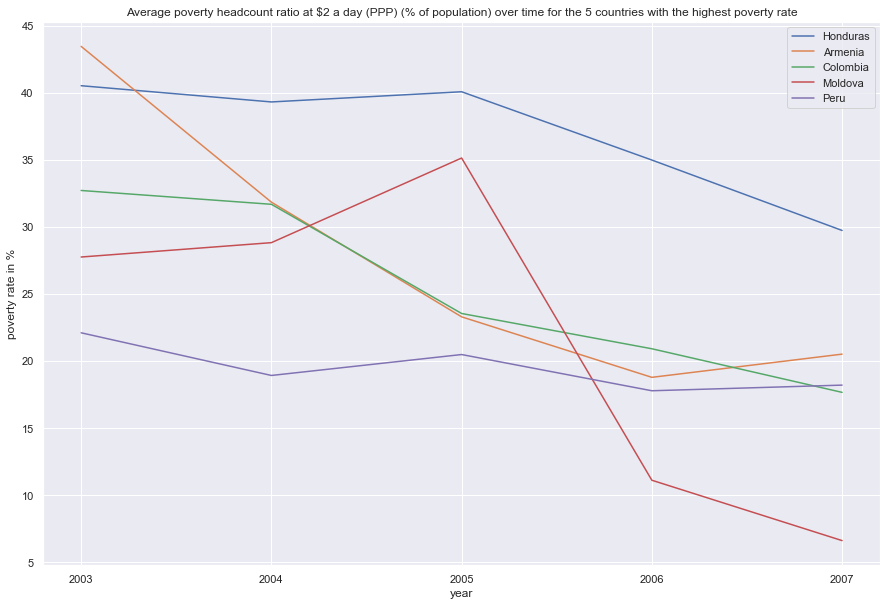

In [15]:
plt.subplots(figsize=(15,10))
pov_detail = pov_data.loc[:, (pov_data.iloc[:]>0).all()]
pov_cou_sel = pov_detail.mean().nlargest(5).index.values
pov_sel = pov_detail[pov_cou_sel]

plt.plot(pov_sel.index.values, pov_sel)
plt.legend(pov_sel.columns.values)
plt.title('Average poverty headcount ratio at $2 a day (PPP) (% of population) over time for the 5 countries with the highest poverty rate')
plt.ylabel('poverty rate in %')
plt.xlabel('year')
plt.show()

Geopmap with the average poverty headcount ratio at $2 a day (PPP) (% of population) in 2007 of the countries which have data for the year 2007. Poverty is mainly located in Latin America as the map shows.

In [16]:
world_map(pov_countries, pov_2007, '% of population', 'Average poverty headcount ratio at $2 a day (PPP) (% of population) in 2007')

In [17]:
stat, p = ttest_rel(pov_sel.loc['2003'], pov_sel.loc['2007'])
'The p-value of poverty rates between 2003 and 2007 is {} so we can say that the difference is significantly different'.format(p)

'The p-value of poverty rates between 2003 and 2007 is 0.013162153096249659 so we can say that the difference is significantly different'

### 7.2 Health indicator

The births attended by skilled health staff increased in the last five years from around 96.7% in 2003 to 99.3% in 2007 for the countries (see the countries below) which have data in the last five years.

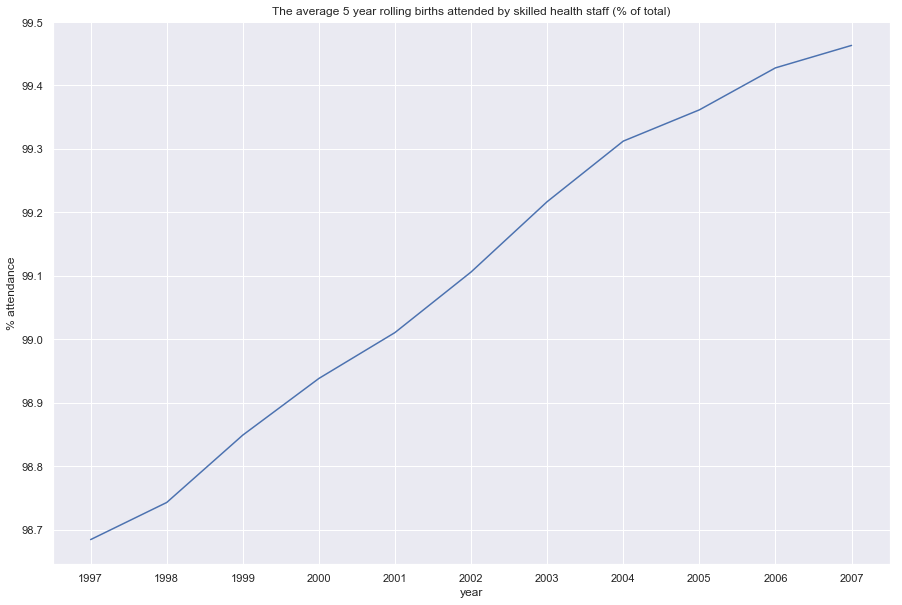

In [18]:
plt.subplots(figsize=(15,10))
health_data = series_to_country('Births attended by skilled health staff (% of total)')
health_last = health_data.iloc[-15:]

health = health_last.loc[:, (health_last.iloc[:]>0).all()]
health = health.mean(axis=1)
plt.plot(health.index.values, health.rolling(5).mean())
plt.title('The average 5 year rolling births attended by skilled health staff (% of total)')
plt.ylabel('% attendance')
plt.xlabel('year')
plt.show()

Below you see a graph that displays evolution (rolling 5 year mean) of births attended by skilled health staff (% in total) of the 5 countries that have the lowest rate and have data for the last 15 years.

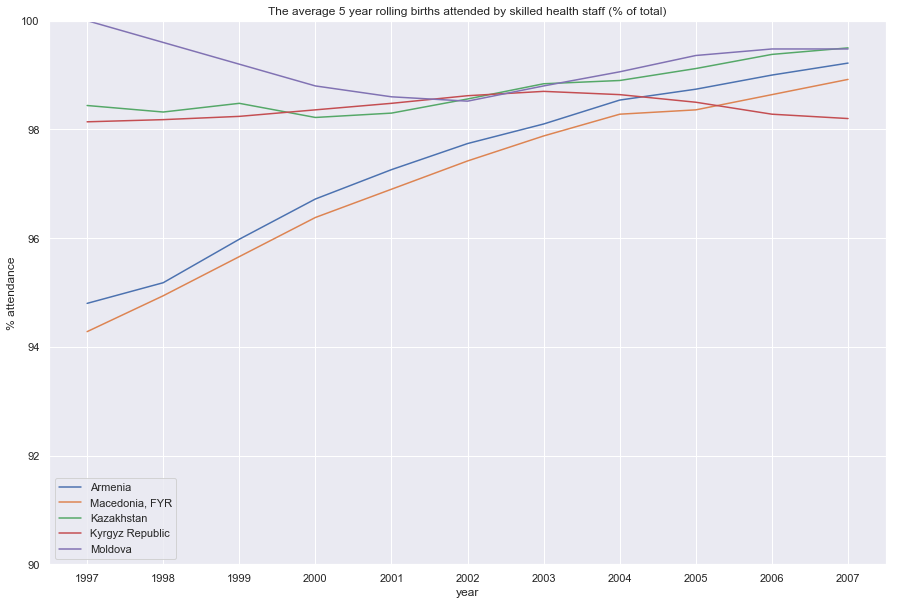

In [19]:
plt.subplots(figsize=(15,10))
health_data = series_to_country('Births attended by skilled health staff (% of total)')
health_last = health_data.iloc[-15: ]

health = health_last.loc[:, (health_last.iloc[:]>0).all()]
countries_health = health.min().nsmallest(5).index.values
health = health[countries_health]

plt.plot(health.index.values, health.rolling(5).mean())
plt.legend(health.columns.values)
plt.ylim(90,100)
plt.title('The average 5 year rolling births attended by skilled health staff (% of total)')
plt.ylabel('% attendance')
plt.xlabel('year')
plt.show()

Geopmap with the births attended by skilled health staff (% of total) in 2007 of the countries which have data for the year 2007.

In [20]:
health_2007 = health_last.loc[:, (health_last.iloc[:]>0).all()].loc['2007']
world_map(health_2007.index.values, health_2007, '% of population', 'Births attended by skilled health staff (% of total) in 2007')

In [21]:
stat, p = ttest_rel(health.loc['1998'], health.loc['2007'])
'The p-value of births attended by skilled health staff between 1998 and 2007 is {} so we can say that the difference is significantly different'.format(p)

'The p-value of births attended by skilled health staff between 1998 and 2007 is 0.032682856030259645 so we can say that the difference is significantly different'

### 7.3 Infant deaths

The infant deaths decreased between 1998 and 2007 for the countries (see the countries below) which have data for those years.

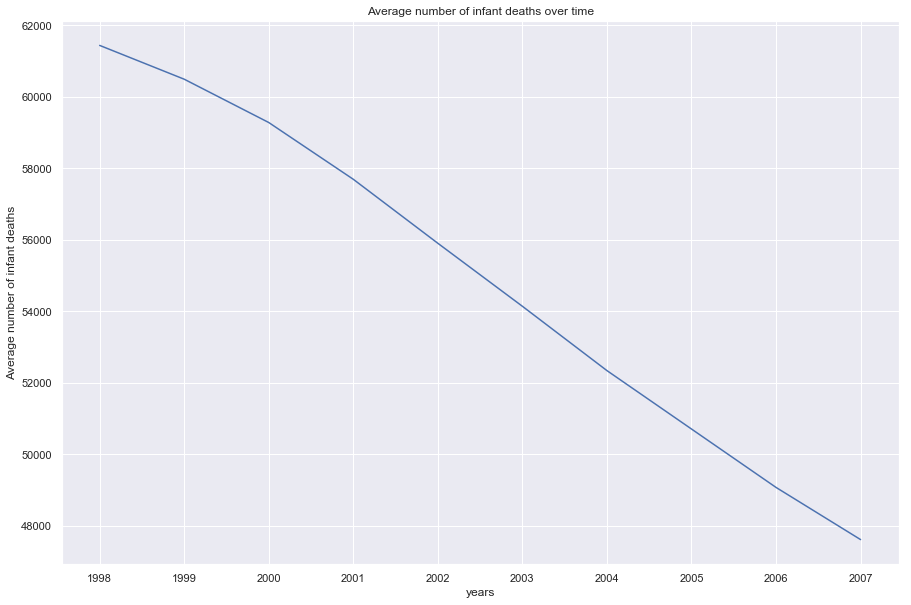

In [22]:
plt.subplots(figsize=(15,10))

inf_death = series_to_country('Number of infant deaths')
inf_death = inf_death.loc[:,(inf_death.iloc[:]>0).all()]
allcountrymean = inf_death.tail(10).mean(axis=1)

plt.title('Average number of infant deaths over time')
plt.ylabel('Average number of infant deaths')
plt.xlabel('years')
plt.plot(allcountrymean)
plt.show()

In [23]:
inf_death = series_to_country('Number of infant deaths')
inf_death = inf_death.loc[:,(inf_death.iloc[:]>0).all()]
inf_death_change = inf_death.loc[['1998', '2007']].pct_change().iloc[1]

world_map(inf_death_change.index.values, inf_death_change, '% change in infant deaths', '% change in infant deaths between 1998 and 2007')

In [24]:
stat, p = ttest_rel(inf_death.loc['1998'], inf_death.loc['2007'])
'The p-value of infant death between 1998 and 2007 is {} so we can say that the difference is significantly different'.format(p)

'The p-value of infant death between 1998 and 2007 is 0.01000853034958281 so we can say that the difference is significantly different'

### Conclusion

First, we looked into the poverty headcount, which was presented by % population of the country that lives at $2 a day. From the graph we can easily spot the decreasing trend of poverty headcount in the world. To avoid bias, we also checked the  top 5 countries with highest poverty rate, and see a decreasing trend for each country as well. In the world map we visualised the location of the countries so we get a better idea of the continental distribution. The 0.01 probbility from ttest justifies the significance of the decrease overtime.

Second, we focused on the health indicators such as births attended by skilled staff. The average percentage increased significantly overtime. We further testified the result with the trend for the 5 countries with least attendance percentages and still see a general increasing trend despite the slight drop for  Moldova. 

Last but not least, we examined the infant death indicator and observed significant decrease. We tracked the percentage change across the world from 1998 to 2007 and from the world map it’s obvious the death rate has dropped overtime. 

In conclusion, we believe the world is getting better based on our selected indicators.
